In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import normalize, StandardScaler , MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import (davies_bouldin_score, silhouette_score, calinski_harabasz_score)
import matplotlib.pyplot as plt
pd.options.display.max_columns=150
pd.options.display.max_colwidth=200
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, precision_score
from sklearn.neighbors import LocalOutlierFactor

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
data =  pd.read_csv('UNSW-NB15_1.csv', header = None, dtype={1: 'object'})
datacols = pd.read_csv('NUSW-NB15_features.csv',encoding='cp1252')
columns = datacols.Name
data.columns = columns

C:\Users\wilkommen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,NaN,0


In [5]:
data['service']= np.where(data['service'] == '-', 'None', data['service'])
data['state']= np.where(data['state'] == 'no', 'None', data['state'])
data['is_sm_ips_ports'] = data['is_sm_ips_ports'].astype(bool)
data['is_ftp_login'] = data['is_ftp_login'].astype(bool)
data['ct_state_ttl'] = data['ct_state_ttl'].astype('category')

In [6]:
num_cols=data.select_dtypes(include='number')
num_cols.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst',
       'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'Label'],
      dtype='object', name='Name')

In [7]:
num_cols = num_cols.drop(columns='Label', axis=1)

In [8]:

scaler = MinMaxScaler()
num_data = scaler.fit_transform(num_cols)

In [9]:
num_data = pd.DataFrame(num_data)

In [10]:
num_data.columns=num_cols.columns
num_data.head()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,1.200687e-07,0.000010,0.000011,0.121569,0.114173,0.0,0.0,0.000095,0.004829,0.000196,0.000182,0.0,0.0,0.0,0.0,0.043883,0.054667,0.0,0.0,0.000000,0.000000,0.0013,0.0,2.832865e-07,2.185413e-07,0.0,0.0,0.0,0.0,0.0,0.046512,0.146341,0.00000,0.040816,0.000000,0.0,0.000000
1,4.112267e-06,0.000039,0.000021,0.121569,0.114173,0.0,0.0,0.000017,0.000392,0.000392,0.000365,0.0,0.0,0.0,0.0,0.087766,0.050667,0.0,0.0,0.000009,0.000014,0.0013,0.0,1.167307e-04,1.271630e-04,0.0,0.0,0.0,0.0,0.0,0.023256,0.073171,0.02439,0.040816,0.000000,0.0,0.027027
2,1.273525e-07,0.000011,0.000012,0.121569,0.114173,0.0,0.0,0.000099,0.004942,0.000196,0.000182,0.0,0.0,0.0,0.0,0.048537,0.059333,0.0,0.0,0.000000,0.000000,0.0013,0.0,2.832865e-07,2.185413e-07,0.0,0.0,0.0,0.0,0.0,0.255814,0.170732,0.00000,0.020408,0.028571,0.0,0.000000
3,1.375953e-07,0.000010,0.000011,0.121569,0.114173,0.0,0.0,0.000083,0.004214,0.000196,0.000182,0.0,0.0,0.0,0.0,0.043883,0.054667,0.0,0.0,0.000000,0.000000,0.0013,0.0,7.165482e-07,2.353522e-07,0.0,0.0,0.0,0.0,0.0,0.116279,0.195122,0.00000,0.000000,0.000000,0.0,0.000000
4,1.330429e-07,0.000011,0.000012,0.121569,0.114173,0.0,0.0,0.000095,0.004730,0.000196,0.000182,0.0,0.0,0.0,0.0,0.048537,0.059333,0.0,0.0,0.000000,0.000000,0.0013,0.0,8.331956e-08,5.043261e-08,0.0,0.0,0.0,0.0,0.0,0.139535,0.195122,0.00000,0.000000,0.000000,0.0,0.000000


In [11]:
cat_cols = data.select_dtypes(exclude='number')

In [12]:
cat_data=cat_cols.drop(['srcip','dstip','sport','dsport', 'attack_cat'], axis=1)
cat_data

Name,proto,state,service,is_sm_ips_ports,ct_state_ttl,is_ftp_login
0,udp,CON,dns,False,0,False
1,udp,CON,None,False,0,False
2,udp,CON,dns,False,0,False
3,udp,CON,dns,False,0,False
4,udp,CON,dns,False,0,False
...,...,...,...,...,...,...
699996,tcp,FIN,None,False,0,False
699997,tcp,FIN,http,False,0,False
699998,tcp,FIN,None,False,0,False
699999,udp,CON,None,False,0,False


In [13]:
cat_data['is_ftp_login']=cat_data['is_ftp_login'].astype('category')
cat_data['is_sm_ips_ports']=cat_data['is_sm_ips_ports'].astype('category')

In [14]:
data_dummies = pd.get_dummies(cat_data, drop_first=True)

In [15]:
data_dummies

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_esp,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,...,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_udt,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CLO,state_CON,state_ECO,state_ECR,state_FIN,state_INT,state_MAS,state_None,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,is_sm_ips_ports_True,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6,is_ftp_login_True
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [16]:
df = pd.concat([data_dummies, num_data ], axis =1)
df

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_esp,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,...,proto_xns-idp,proto_xtp,proto_zero,state_CLO,state_CON,state_ECO,state_ECR,state_FIN,state_INT,state_MAS,state_None,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,is_sm_ips_ports_True,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6,is_ftp_login_True,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.200687e-07,0.000010,0.000011,0.121569,0.114173,0.000000,0.000000,0.000095,0.004829,0.000196,0.000182,0.0,0.0,0.000000,0.000000,0.043883,0.054667,0.000,0.000000,0.000000,0.000000e+00,0.001300,0.0,2.832865e-07,2.185413e-07,0.000000,0.000000,0.000000,0.000000,0.0,0.046512,0.146341,0.000000,0.040816,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.112267e-06,0.000039,0.000021,0.121569,0.114173,0.000000,0.000000,0.000017,0.000392,0.000392,0.000365,0.0,0.0,0.000000,0.000000,0.087766,0.050667,0.000,0.000000,0.000009,1.367440e-05,0.001300,0.0,1.167307e-04,1.271630e-04,0.000000,0.000000,0.000000,0.000000,0.0,0.023256,0.073171,0.024390,0.040816,0.000000,0.000000,0.027027
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.273525e-07,0.000011,0.000012,0.121569,0.114173,0.000000,0.000000,0.000099,0.004942,0.000196,0.000182,0.0,0.0,0.000000,0.000000,0.048537,0.059333,0.000,0.000000,0.000000,0.000000e+00,0.001300,0.0,2.832865e-07,2.185413e-07,0.000000,0.000000,0.000000,0.000000,0.0,0.255814,0.170732,0.000000,0.020408,0.028571,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.375953e-07,0.000010,0.000011,0.121569,0.114173,0.000000,0.000000,0.000083,0.004214,0.000196,0.000182,0.0,0.0,0.000000,0.000000,0.043883,0.054667,0.000,0.000000,0.000000,0.000000e+00,0.001300,0.0,7.165482e-07,2.353522e-07,0.000000,0.000000,0.000000,0.000000,0.0,0.116279,0.195122,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Statistical Informations of Dataset

In [17]:
# Determine number of anomaly cases in dataset

Anomaly = data[data['Label'] == 1]
Non_Anomaly = data[data['Label'] == 0]

outlier_fraction = len(Anomaly)/float(len(Non_Anomaly))
print(outlier_fraction)

print('Anomaly Cases: {}'.format(len(data[data['Label'] == 1])))
print('Non_Anomaly: {}'.format(len(data[data['Label'] == 0])))

0.032775831899744166
Anomaly Cases: 22215
Non_Anomaly: 677786


In [19]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Anomaly"]]

# Store the variable we'll be predicting on
target = "Label"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(700001, 49)
(700001,)


## **LOF - LOCAL OUTLIER FACTOR**

### Full Model

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(df)

In [42]:
pca_comp = pd.DataFrame(pca_components)

In [44]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf = LocalOutlierFactor(n_neighbors=30, contamination=0.03,metric='euclidean',algorithm='auto', n_jobs= -1, p=1)

y_pred_full = clf.fit_predict(pca_comp)
scores_pred = clf.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_full[y_pred_full == 1] = 0
y_pred_full[y_pred_full == -1] = 1
    
n_errors = (y_pred_full != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_full))
print(accuracy_score(Y, y_pred_full))
print(classification_report(Y, y_pred_full))

LOF sum_of_predict_errors: 38579
col_0       0      1
Label               
0      659104  18682
1       19897   2318
0.9448872215896834
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    677786
           1       0.11      0.10      0.11     22215

    accuracy                           0.94    700001
   macro avg       0.54      0.54      0.54    700001
weighted avg       0.94      0.94      0.94    700001



In [45]:
calinski_harabasz_score(df, y_pred_full)

21371.409638991947

In [46]:
davies_bouldin_score(df, y_pred_full)

1.7302360653800166

### Model with Selected Features

In [19]:
service_dummy=pd.get_dummies(data['service'], drop_first=True)
selected_df=pd.concat([num_data[['sttl', 'sbytes', 'smeansz', 'ct_dst_sport_ltm']], service_dummy], axis=1)

In [20]:
selected_df

,sttl,sbytes,smeansz,ct_dst_sport_ltm,dhcp,dns,ftp,ftp-data,http,irc,pop3,radius,smtp,snmp,ssh,ssl
0,0.121569,0.000010,0.043883,0.000000,0,1,0,0,0,0,0,0,0,0,0,0
1,0.121569,0.000039,0.087766,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
2,0.121569,0.000011,0.048537,0.000000,0,1,0,0,0,0,0,0,0,0,0,0
3,0.121569,0.000010,0.043883,0.000000,0,1,0,0,0,0,0,0,0,0,0,0
4,0.121569,0.000011,0.048537,0.000000,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,0.121569,0.000023,0.035239,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
699997,0.121569,0.001419,0.035239,0.030303,0,0,0,0,1,0,0,0,0,0,0,0
699998,0.121569,0.000158,0.059840,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
699999,0.121569,0.000042,0.094415,0.000000,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf_selected = LocalOutlierFactor(n_neighbors=30, contamination=0.03,metric='euclidean', n_jobs= -1, p=1)

y_pred_selected = clf_selected.fit_predict(selected_df)
scores_pred_selected = clf_selected.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_selected[y_pred_selected == 1] = 0
y_pred_selected[y_pred_selected == -1] = 1
    
n_errors = (y_pred_selected != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_selected))
print(accuracy_score(Y, y_pred_selected))
print(classification_report(Y, y_pred_selected))

LOF sum_of_predict_errors: 36469
col_0       0      1
Label               
0      660159  17627
1       18842   3373
0.9479015029978528
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    677786
           1       0.16      0.15      0.16     22215

    accuracy                           0.95    700001
   macro avg       0.57      0.56      0.56    700001
weighted avg       0.95      0.95      0.95    700001



In [49]:
calinski_harabasz_score(selected_df, y_pred_selected)

2379.1961681025687

In [50]:
davies_bouldin_score(selected_df, y_pred_selected)

4.572171745761193

### Model 1

In [20]:
df1=df[['sbytes', 'sttl']].copy()

In [23]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf_df1 = LocalOutlierFactor(n_neighbors=30, contamination=0.03,metric='euclidean', n_jobs= -1, p=1)

y_pred_df1 = clf_df1.fit_predict(df1)
scores_pred_df1 = clf_df1.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_df1[y_pred_df1 == 1] = 0
y_pred_df1[y_pred_df1 == -1] = 1
    
n_errors = (y_pred_df1 != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_df1))
print(accuracy_score(Y, y_pred_df1))
print(classification_report(Y, y_pred_df1))

LOF sum_of_predict_errors: 32696
col_0       0      1
Label               
0      662220  15566
1       17130   5085
0.9532914952978638
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    677786
           1       0.25      0.23      0.24     22215

    accuracy                           0.95    700001
   macro avg       0.61      0.60      0.61    700001
weighted avg       0.95      0.95      0.95    700001



In [29]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf_df1 = LocalOutlierFactor(n_neighbors=30, contamination=0.03,metric='euclidean', n_jobs= -1, p=2)

y_pred_df1 = clf_df1.fit_predict(df1)
scores_pred_df1 = clf_df1.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_df1[y_pred_df1 == 1] = 0
y_pred_df1[y_pred_df1 == -1] = 1
    
n_errors = (y_pred_df1 != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_df1))
print(accuracy_score(Y, y_pred_df1))
print(classification_report(Y, y_pred_df1))

LOF sum_of_predict_errors: 32696
col_0       0      1
Label               
0      662220  15566
1       17130   5085
0.9532914952978638
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    677786
           1       0.25      0.23      0.24     22215

    accuracy                           0.95    700001
   macro avg       0.61      0.60      0.61    700001
weighted avg       0.95      0.95      0.95    700001



In [24]:
calinski_harabasz_score(df1, y_pred_df1)

22745.351333359362

In [25]:
davies_bouldin_score(df1, y_pred_df1)

2.008290299079868

### Model 2

In [31]:
df2=df[['sbytes', 'sttl', 'dttl']].copy()

In [30]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf_df2 = LocalOutlierFactor(n_neighbors=30, contamination=0.03,metric='euclidean', n_jobs= -1, p=1)

y_pred_df2 = clf_df2.fit_predict(df2)
scores_pred_df2 = clf_df2.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_df2[y_pred_df2 == 1] = 0
y_pred_df2[y_pred_df2 == -1] = 1
    
n_errors = (y_pred_df2 != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_df2))
print(accuracy_score(Y, y_pred_df2))
print(classification_report(Y, y_pred_df2))

LOF sum_of_predict_errors: 33310
col_0       0      1
Label               
0      661742  16044
1       17266   4949
0.9524143536937805
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    677786
           1       0.24      0.22      0.23     22215

    accuracy                           0.95    700001
   macro avg       0.61      0.60      0.60    700001
weighted avg       0.95      0.95      0.95    700001



In [30]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf_df2 = LocalOutlierFactor(n_neighbors=30, contamination=0.03,metric='euclidean', n_jobs= -1, p=2)

y_pred_df2 = clf_df2.fit_predict(df2)
scores_pred_df2 = clf_df2.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_df2[y_pred_df2 == 1] = 0
y_pred_df2[y_pred_df2 == -1] = 1
    
n_errors = (y_pred_df2 != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_df2))
print(accuracy_score(Y, y_pred_df2))
print(classification_report(Y, y_pred_df2))

LOF sum_of_predict_errors: 33310
col_0       0      1
Label               
0      661742  16044
1       17266   4949
0.9524143536937805
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    677786
           1       0.24      0.22      0.23     22215

    accuracy                           0.95    700001
   macro avg       0.61      0.60      0.60    700001
weighted avg       0.95      0.95      0.95    700001



In [85]:
calinski_harabasz_score(df2, index1)

28249.852626360964

In [86]:
davies_bouldin_score(df2, index1)

1.605847601247555

### Model3

In [30]:
df3=df[['sbytes', 'sttl','tcprtt','synack']].copy()

In [31]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf_df3 = LocalOutlierFactor(n_neighbors=100, contamination=0.03,metric='euclidean', n_jobs= -1, p=1)

y_pred_df3 = clf_df3.fit_predict(df3)
scores_pred_df3 = clf_df3.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_df3[y_pred_df3 == 1] = 0
y_pred_df3[y_pred_df3 == -1] = 1
    
n_errors = (y_pred_df3 != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_df3))
print(accuracy_score(Y, y_pred_df3))
print(classification_report(Y, y_pred_df3))

LOF sum_of_predict_errors: 40991
col_0       0      1
Label               
0      657898  19888
1       21103   1112
0.9414415122264111
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    677786
           1       0.05      0.05      0.05     22215

    accuracy                           0.94    700001
   macro avg       0.51      0.51      0.51    700001
weighted avg       0.94      0.94      0.94    700001



In [32]:
calinski_harabasz_score(df3, y_pred_df3)

260.0630865084028

In [33]:
davies_bouldin_score(df3, y_pred_df3)

8.217932016271524

### Model 4

In [34]:
df4=df[['sbytes', 'sttl','tcprtt','synack', 'ackdat']].copy()

In [35]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf_df4 = LocalOutlierFactor(n_neighbors=30, contamination=0.03,metric='euclidean', n_jobs= -1, p=1)

y_pred_df4 = clf_df4.fit_predict(df4)
scores_pred_df4 = clf_df4.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_df4[y_pred_df4 == 1] = 0
y_pred_df4[y_pred_df4 == -1] = 1
    
n_errors = (y_pred_df4 != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_df4))
print(accuracy_score(Y, y_pred_df4))
print(classification_report(Y, y_pred_df4))

LOF sum_of_predict_errors: 40865
col_0       0      1
Label               
0      657961  19825
1       21040   1175
0.9416215119692686
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    677786
           1       0.06      0.05      0.05     22215

    accuracy                           0.94    700001
   macro avg       0.51      0.51      0.51    700001
weighted avg       0.94      0.94      0.94    700001



In [36]:
calinski_harabasz_score(df4, y_pred_df4)

347.94391047661935

In [37]:
davies_bouldin_score(df4, y_pred_df4)

7.338630967168494

### Model 5

In [31]:
df5=df[['sbytes', 'sttl','tcprtt','synack', 'ackdat', 'Sload']].copy()

In [32]:
# Fit the model
n_outliers = len(Anomaly)

#clf = LocalOutlierFactor(algorithm='auto', metric='manhattan'). 
clf_df5 = LocalOutlierFactor(n_neighbors=30, contamination=0.03,metric='euclidean', n_jobs= -1, p=1)

y_pred_df5 = clf_df5.fit_predict(df5)
scores_pred_df5 = clf_df5.negative_outlier_factor_
    
# Reshape the prediction values to 0 for valid, 1 for Amomaly. 
y_pred_df5[y_pred_df5 == 1] = 0
y_pred_df5[y_pred_df5 == -1] = 1
    
n_errors = (y_pred_df5 != Y).sum()
    
# Run classification metrics
print('{}: {}'.format('LOF sum_of_predict_errors', n_errors))
print(pd.crosstab(Y, y_pred_df5))
print(accuracy_score(Y, y_pred_df5))
print(classification_report(Y, y_pred_df5))

LOF sum_of_predict_errors: 40201
col_0       0      1
Label               
0      658293  19493
1       20708   1507
0.94257008204274
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    677786
           1       0.07      0.07      0.07     22215

    accuracy                           0.94    700001
   macro avg       0.52      0.52      0.52    700001
weighted avg       0.94      0.94      0.94    700001



In [33]:
calinski_harabasz_score(df5, y_pred_df5)

1533.399669010553

In [34]:
davies_bouldin_score(df5, y_pred_df5)

4.352141209213108

#### We have obtained best scores in Model 3 attributes. Therefore we use these attributes for hyperparameter tuning. 

### Hyperparameter Tuning

In [21]:
params = {'n_neighbors': [10, 20,30,50,100,150,300,400],
         'metric': ['euclidean', 'manhattan', 'minkowski']}

score_table = pd.DataFrame(columns=['Number of Neighbors', 'Metric',
                                    'Calinski Harabasz Score', 'Davies Bouldin Score' , 'Recall' , 'Precision' ])


for maxmet in params['metric']:
    for num_ngb in params['n_neighbors']:
        clf = LocalOutlierFactor(n_neighbors=num_ngb, contamination=0.032,metric=maxmet, n_jobs= -1, p=1)
        y_pred = clf.fit_predict(df1)
        scores_pred = clf.negative_outlier_factor_
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
        n_errors = (y_pred != Y).sum()

        recall = recall_score(Y, y_pred)
        precision = precision_score(Y, y_pred)
        calinski = calinski_harabasz_score(df1, y_pred)
        davies = davies_bouldin_score(df1, y_pred)
        score_table=score_table.append({'Number of Neighbors':num_ngb, 
                                        'Metric':maxmet,
                                        'Calinski Harabasz Score':calinski, 
                                        'Davies Bouldin Score':davies,
                                        'Recall' : recall,
                                        'Precision' : precision}, ignore_index=True)
        print(score_table)

display(score_table)

  Number of Neighbors     Metric  Calinski Harabasz Score  \
0                  10  euclidean             15370.364786   

   Davies Bouldin Score    Recall  Precision  
0              2.006506  0.167454   0.270388  
  Number of Neighbors     Metric  Calinski Harabasz Score  \
0                  10  euclidean             15370.364786   
1                  20  euclidean             20801.837934   

   Davies Bouldin Score    Recall  Precision  
0              2.006506  0.167454   0.270388  
1              1.981861  0.210038   0.262194  
  Number of Neighbors     Metric  Calinski Harabasz Score  \
0                  10  euclidean             15370.364786   
1                  20  euclidean             20801.837934   
2                  30  euclidean             22745.351333   

   Davies Bouldin Score    Recall  Precision  
0              2.006506  0.167454   0.270388  
1              1.981861  0.210038   0.262194  
2              2.008290  0.228899   0.246235  
  Number of Neighbors    

   Number of Neighbors     Metric  Calinski Harabasz Score  \
0                   10  euclidean             15370.364786   
1                   20  euclidean             20801.837934   
2                   30  euclidean             22745.351333   
3                   50  euclidean             22211.658005   
4                  100  euclidean             13252.916945   
5                  150  euclidean              5577.734423   
6                  300  euclidean               728.455933   
7                  400  euclidean              1092.170978   
8                   10  manhattan             15370.364786   
9                   20  manhattan             20796.703998   
10                  30  manhattan             22745.351333   
11                  50  manhattan             22211.658005   

    Davies Bouldin Score    Recall  Precision  
0               2.006506  0.167454   0.270388  
1               1.981861  0.210038   0.262194  
2               2.008290  0.228899   0.246235  
3

   Number of Neighbors     Metric  Calinski Harabasz Score  \
0                   10  euclidean             15370.364786   
1                   20  euclidean             20801.837934   
2                   30  euclidean             22745.351333   
3                   50  euclidean             22211.658005   
4                  100  euclidean             13252.916945   
5                  150  euclidean              5577.734423   
6                  300  euclidean               728.455933   
7                  400  euclidean              1092.170978   
8                   10  manhattan             15370.364786   
9                   20  manhattan             20796.703998   
10                  30  manhattan             22745.351333   
11                  50  manhattan             22211.658005   
12                 100  manhattan             13252.916945   
13                 150  manhattan              5577.734423   
14                 300  manhattan               728.455933   
15      

   Number of Neighbors     Metric  Calinski Harabasz Score  \
0                   10  euclidean             15370.364786   
1                   20  euclidean             20801.837934   
2                   30  euclidean             22745.351333   
3                   50  euclidean             22211.658005   
4                  100  euclidean             13252.916945   
5                  150  euclidean              5577.734423   
6                  300  euclidean               728.455933   
7                  400  euclidean              1092.170978   
8                   10  manhattan             15370.364786   
9                   20  manhattan             20796.703998   
10                  30  manhattan             22745.351333   
11                  50  manhattan             22211.658005   
12                 100  manhattan             13252.916945   
13                 150  manhattan              5577.734423   
14                 300  manhattan               728.455933   
15      

,Number of Neighbors,Metric,Calinski Harabasz Score,Davies Bouldin Score,Recall,Precision
0,10,euclidean,15370.364786,2.006506,0.167454,0.270388
1,20,euclidean,20801.837934,1.981861,0.210038,0.262194
2,30,euclidean,22745.351333,2.008290,0.228899,0.246235
3,50,euclidean,22211.658005,2.053308,0.240828,0.238839
4,100,euclidean,13252.916945,2.338335,0.189647,0.188114
5,150,euclidean,5577.734423,2.941578,0.138690,0.137545
6,300,euclidean,728.455933,5.721034,0.061760,0.061655
7,400,euclidean,1092.170978,4.938740,0.060635,0.060374
8,10,manhattan,15370.364786,2.006506,0.167454,0.270388
9,20,manhattan,20796.703998,1.982066,0.210038,0.262150


In [23]:
params = {'n_neighbors': [10, 20,30,50,100,150,300,400],
         'metric': ['euclidean', 'manhattan', 'minkowski']}

score_table = pd.DataFrame(columns=['Number of Neighbors', 'Metric',
                                    'Calinski Harabasz Score', 'Davies Bouldin Score' , 'Recall' , 'Precision' ])


for maxmet in params['metric']:
    for num_ngb in params['n_neighbors']:
        clf = LocalOutlierFactor(n_neighbors=num_ngb, contamination=0.032,metric=maxmet, n_jobs= -1, p=1)
        y_pred = clf.fit_predict(df2)
        scores_pred = clf.negative_outlier_factor_
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
        n_errors = (y_pred != Y).sum()

        recall = recall_score(Y, y_pred)
        precision = precision_score(Y, y_pred)
        calinski = calinski_harabasz_score(df1, y_pred)
        davies = davies_bouldin_score(df1, y_pred)
        score_table=score_table.append({'Number of Neighbors':num_ngb, 
                                        'Metric':maxmet,
                                        'Calinski Harabasz Score':calinski, 
                                        'Davies Bouldin Score':davies,
                                        'Recall' : recall,
                                        'Precision' : precision}, ignore_index=True)
        print(score_table)

display(score_table)

  Number of Neighbors     Metric  Calinski Harabasz Score  \
0                  10  euclidean             18779.771767   

   Davies Bouldin Score    Recall  Precision  
0              1.947075  0.180914   0.275199  
  Number of Neighbors     Metric  Calinski Harabasz Score  \
0                  10  euclidean             18779.771767   
1                  20  euclidean             22203.045092   

   Davies Bouldin Score    Recall  Precision  
0              1.947075  0.180914   0.275199  
1              1.969672  0.216700   0.260766  
  Number of Neighbors     Metric  Calinski Harabasz Score  \
0                  10  euclidean             18779.771767   
1                  20  euclidean             22203.045092   
2                  30  euclidean             23334.678228   

   Davies Bouldin Score    Recall  Precision  
0              1.947075  0.180914   0.275199  
1              1.969672  0.216700   0.260766  
2              2.014993  0.233266   0.241608  
  Number of Neighbors    

   Number of Neighbors     Metric  Calinski Harabasz Score  \
0                   10  euclidean             18779.771767   
1                   20  euclidean             22203.045092   
2                   30  euclidean             23334.678228   
3                   50  euclidean             23012.501609   
4                  100  euclidean             12452.103010   
5                  150  euclidean              5448.238515   
6                  300  euclidean              1328.089138   
7                  400  euclidean              2576.551183   
8                   10  manhattan             18872.293132   
9                   20  manhattan             22186.440618   
10                  30  manhattan             23465.633808   
11                  50  manhattan             22766.209484   

    Davies Bouldin Score    Recall  Precision  
0               1.947075  0.180914   0.275199  
1               1.969672  0.216700   0.260766  
2               2.014993  0.233266   0.241608  
3

   Number of Neighbors     Metric  Calinski Harabasz Score  \
0                   10  euclidean             18779.771767   
1                   20  euclidean             22203.045092   
2                   30  euclidean             23334.678228   
3                   50  euclidean             23012.501609   
4                  100  euclidean             12452.103010   
5                  150  euclidean              5448.238515   
6                  300  euclidean              1328.089138   
7                  400  euclidean              2576.551183   
8                   10  manhattan             18872.293132   
9                   20  manhattan             22186.440618   
10                  30  manhattan             23465.633808   
11                  50  manhattan             22766.209484   
12                 100  manhattan             12461.540800   
13                 150  manhattan              5448.238515   
14                 300  manhattan              1328.089138   
15      

   Number of Neighbors     Metric  Calinski Harabasz Score  \
0                   10  euclidean             18779.771767   
1                   20  euclidean             22203.045092   
2                   30  euclidean             23334.678228   
3                   50  euclidean             23012.501609   
4                  100  euclidean             12452.103010   
5                  150  euclidean              5448.238515   
6                  300  euclidean              1328.089138   
7                  400  euclidean              2576.551183   
8                   10  manhattan             18872.293132   
9                   20  manhattan             22186.440618   
10                  30  manhattan             23465.633808   
11                  50  manhattan             22766.209484   
12                 100  manhattan             12461.540800   
13                 150  manhattan              5448.238515   
14                 300  manhattan              1328.089138   
15      

,Number of Neighbors,Metric,Calinski Harabasz Score,Davies Bouldin Score,Recall,Precision
0,10,euclidean,18779.771767,1.947075,0.180914,0.275199
1,20,euclidean,22203.045092,1.969672,0.216700,0.260766
2,30,euclidean,23334.678228,2.014993,0.233266,0.241608
3,50,euclidean,23012.501609,2.042264,0.236912,0.234955
4,100,euclidean,12452.103010,2.370961,0.187531,0.185982
5,150,euclidean,5448.238515,2.972376,0.137790,0.136933
6,300,euclidean,1328.089138,4.637684,0.066442,0.066005
7,400,euclidean,2576.551183,3.726250,0.075084,0.075342
8,10,manhattan,18872.293132,1.945160,0.181229,0.275527
9,20,manhattan,22186.440618,1.970071,0.216655,0.260684


## Best Model


In [ ]:
iso_model_best = LocalOutlierFactor(n_neighbors=15, metric='euclidean', algorithm='auto', contamination=0.032, n_jobs=-1)

anomaly_preds_best = iso_model_best.predict(df)
pd.crosstab(anomaly_labels, anomaly_preds_best)

In [ ]:
sns.set(rc={'figure.figsize':(24,16)})
sns.scatterplot(x= pca_components[:, 0], y= pca_components[:, 1], hue=scores_pred)   #scores_pred   #y_pred
plt.title('Local Outlier Factor (LOF)', fontsize=14)

## Conclusion


#### PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(df)

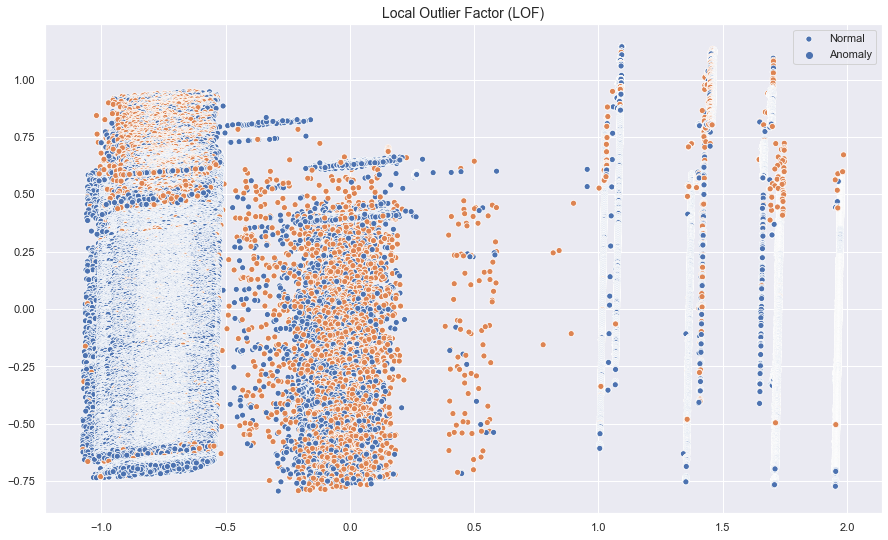

In [32]:
sns.set(rc={'figure.figsize':(15,9)})
sns.scatterplot(x= pca_components[:, 0], y= pca_components[:, 1], hue=y_pred_df2) 
plt.title('Local Outlier Factor (LOF)', fontsize=14)
plt.legend(labels=['Normal', 'Anomaly'])

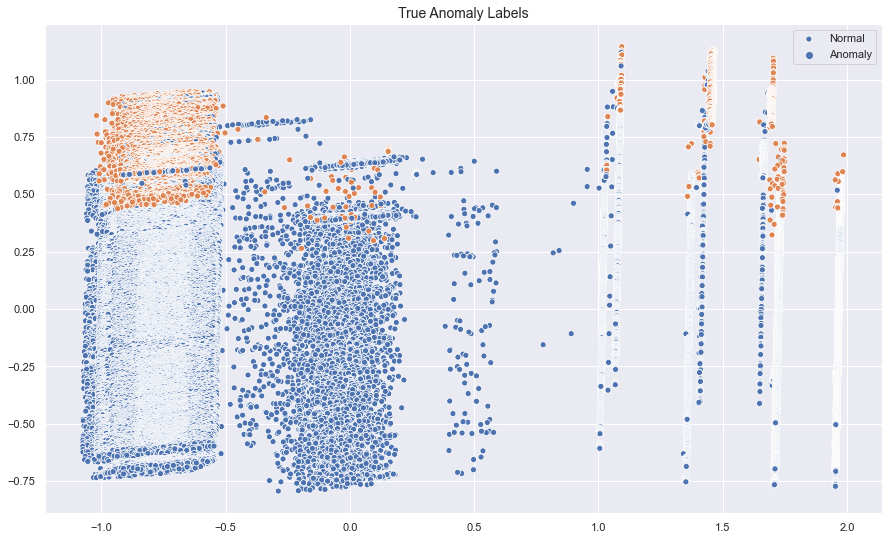

In [44]:
sns.set(rc={'figure.figsize':(15,9)})
sns.scatterplot(x= pca_components[:, 0], y= pca_components[:, 1], hue=Yy) 
plt.title('True Anomaly Labels', fontsize=14)
plt.legend(labels=['Normal', 'Anomaly'])